In [1]:
import torch
from torch import nn
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as spio
from sklearn.decomposition import PCA

from modules import optimize_ML

### Load data

In [2]:
# load sample trajectory
sim_idx = 0 # which out of the 100 trajectories to use
data_path = Path('data')
f_name = 'sim_0128.mat'
S = spio.loadmat(Path(data_path) / f_name)['S']
S_list = [S[0, i] for i in range(S.shape[1])]  # convert to list of structs

# unpack data
n_corr_obs = S_list[sim_idx]['Pc_reshaped'][0, 0] * S_list[sim_idx]['num_trials_mat'][0, 0]
n_total_obs = S_list[sim_idx]['num_trials_mat'][0, 0]
n_frames = S_list[sim_idx]['Pc_reshaped'][0, 0].shape[0]
n_dim = S_list[sim_idx]['x'][0, 0].shape[0]

### Run optimization

In [3]:
# loss, x, c, p = run_MLEfit(n_dim, n_corr_obs, n_total_obs)
x, c, p, _, _, _ = optimize_ML(n_dim, n_corr_obs, n_total_obs, verbose=True, n_starts=10)

Current loss: 441.26273526996374
Loss updated
Iteration 1 | Loss: 441.26273526996374
Current loss: 421.44133453816175
Loss updated
Iteration 2 | Loss: 421.44133453816175
Current loss: 450.2683066278696
Iteration 3 | Loss: 450.2683066278696
Current loss: 421.29956816136837
Loss updated
Iteration 4 | Loss: 421.29956816136837
Current loss: 436.66855123639107
Iteration 5 | Loss: 436.66855123639107
Current loss: 442.3695276901126
Iteration 6 | Loss: 442.3695276901126
Current loss: 443.8093143552542
Iteration 7 | Loss: 443.8093143552542
Current loss: 472.98068292438984
Iteration 8 | Loss: 472.98068292438984
Current loss: 442.8748227581382
Iteration 9 | Loss: 442.8748227581382
Current loss: 449.79478358477354
Iteration 10 | Loss: 449.79478358477354


In [4]:
# plt.plot(loss)
# plt.title('Loss over iterations')
# plt.show()

In [5]:
# compute PC-reduced perceptual locations
pca_true = PCA(n_components=2)
pca_fit = PCA(n_components=2)

# ground truth perceptual locations
pca_true.fit(S_list[sim_idx]['x'][0, 0])
pc_true = pca_true.components_

pca_fit.fit(x.squeeze().detach())
pc_fit = pca_fit.components_

In [6]:
# fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# axs[0, 0].plot(pc_true[0, :], pc_true[1, :], '-ko', markersize=10, markerfacecolor='r', linewidth=1)
# axs[0, 0].set_title('Ground truth trajectory')
# axs[0, 0].set_xlabel('PC 1')
# axs[0, 0].set_ylabel('PC 2')
# axs[0, 0].set_box_aspect(1)  
# axs[0, 0].set_aspect('equal') 
# axs[0, 0].spines['top'].set_visible(False)  
# axs[0, 0].spines['right'].set_visible(False)

# sns.heatmap(S_list[sim_idx]['Pc_reshaped'][0, 0], ax=axs[0, 1], cmap='gray')
# axs[0, 1].invert_yaxis()
# axs[0, 1].set_title('Simulated discriminability')

# axs[0, 2].plot(torch.flatten(torch.rad2deg(c)).detach(), np.rad2deg(S_list[sim_idx]['c'][0, 0]).flatten(), 'go')
# axs[0, 2].plot([0, 180], [0, 180], 'k--')
# axs[0, 2].set_xlabel('Estimated curvature')
# axs[0, 2].set_ylabel('Ground truth curvature')

# axs[1, 0].plot(pc_fit[0, :], pc_fit[1, :], '-ko', markersize=10, markerfacecolor='g', linewidth=1)
# axs[1, 0].set_title('Estimated trajectory')
# axs[1, 0].set_xlabel('PC 1')
# axs[1, 0].set_ylabel('PC 2')
# axs[1, 0].set_box_aspect(1)  
# axs[1, 0].set_aspect('equal') 
# axs[1, 0].spines['top'].set_visible(False)  
# axs[1, 0].spines['right'].set_visible(False)

# sns.heatmap(p.detach(), ax=axs[1, 1], cmap='gray')
# axs[1, 1].invert_yaxis()
# axs[1, 1].set_title('Estimated proportion correct')

# axs[1, 2].plot(torch.flatten(p).detach(), S_list[sim_idx]['Pc_reshaped'][0, 0].flatten(), 'ro')
# axs[1, 2].plot([0.5, 1], [0.5, 1], 'k--')
# axs[1, 2].set_xlabel('Estimated performance')
# axs[1, 2].set_ylabel('Observed performance')

# plt.show()

/opt/anaconda3/envs/vision/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


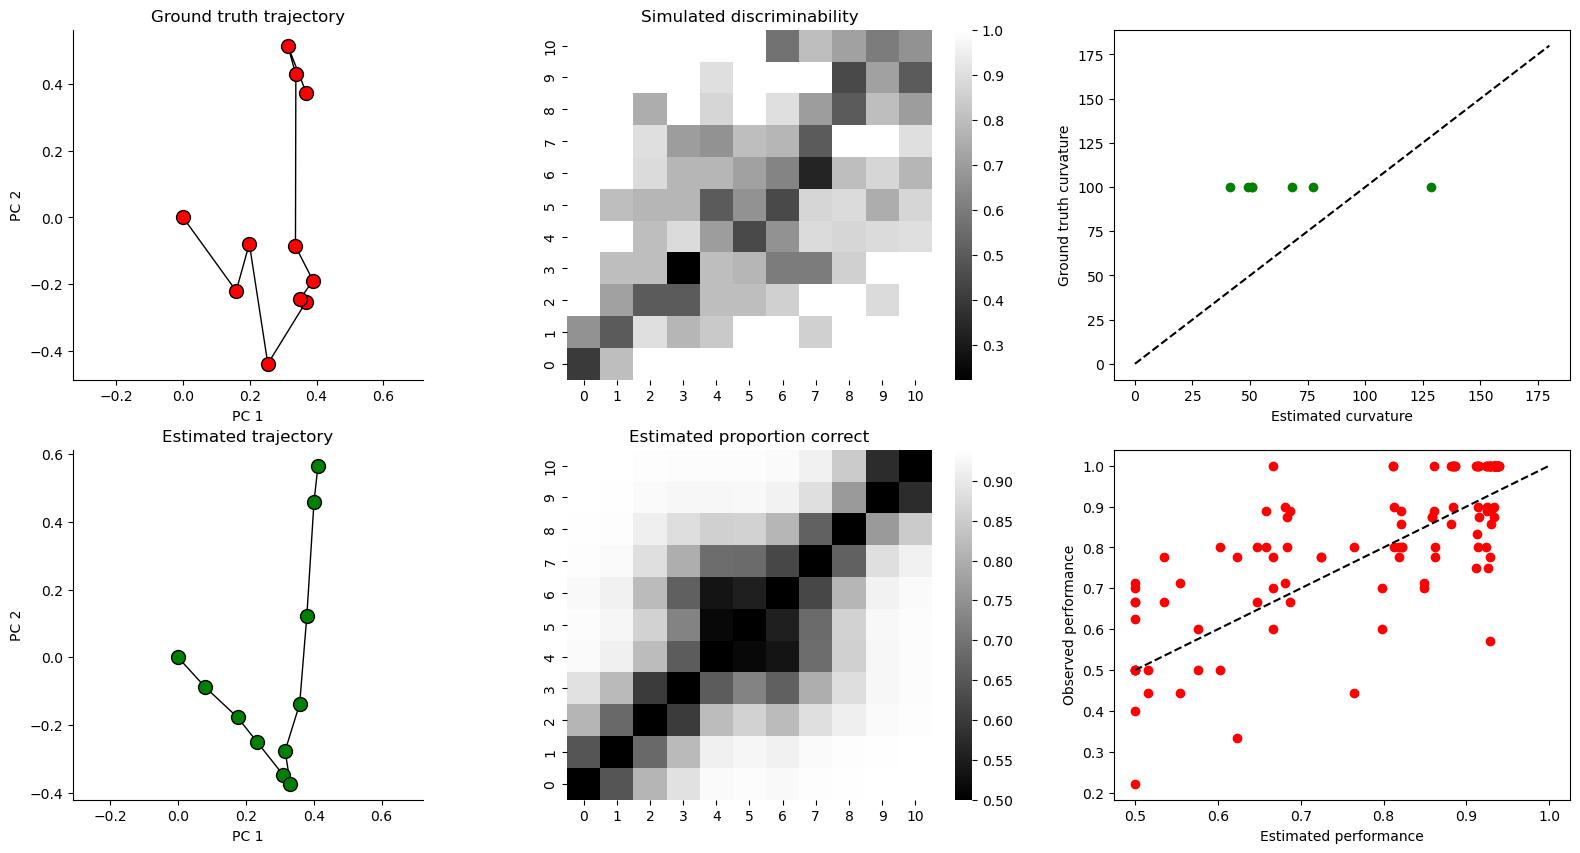

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs[0, 0].plot(pc_true[0, :], pc_true[1, :], '-ko', markersize=10, markerfacecolor='r', linewidth=1)
axs[0, 0].set_title('Ground truth trajectory')
axs[0, 0].set_xlabel('PC 1')
axs[0, 0].set_ylabel('PC 2')
axs[0, 0].set_box_aspect(1)  
axs[0, 0].set_aspect('equal') 
axs[0, 0].spines['top'].set_visible(False)  
axs[0, 0].spines['right'].set_visible(False)

sns.heatmap(S_list[sim_idx]['Pc_reshaped'][0, 0], ax=axs[0, 1], cmap='gray')
axs[0, 1].invert_yaxis()
axs[0, 1].set_title('Simulated discriminability')

axs[0, 2].plot(torch.flatten(torch.rad2deg(c)).detach(), np.rad2deg(S_list[sim_idx]['c'][0, 0]).flatten(), 'go')
axs[0, 2].plot([0, 180], [0, 180], 'k--')
axs[0, 2].set_xlabel('Estimated curvature')
axs[0, 2].set_ylabel('Ground truth curvature')

axs[1, 0].plot(pc_fit[0, :], pc_fit[1, :], '-ko', markersize=10, markerfacecolor='g', linewidth=1)
axs[1, 0].set_title('Estimated trajectory')
axs[1, 0].set_xlabel('PC 1')
axs[1, 0].set_ylabel('PC 2')
axs[1, 0].set_box_aspect(1)  
axs[1, 0].set_aspect('equal') 
axs[1, 0].spines['top'].set_visible(False)  
axs[1, 0].spines['right'].set_visible(False)

sns.heatmap(p.squeeze(), ax=axs[1, 1], cmap='gray')
axs[1, 1].invert_yaxis()
axs[1, 1].set_title('Estimated proportion correct')

axs[1, 2].plot(p.flatten(), S_list[sim_idx]['Pc_reshaped'][0, 0].flatten(), 'ro')
axs[1, 2].plot([0.5, 1], [0.5, 1], 'k--')
axs[1, 2].set_xlabel('Estimated performance')
axs[1, 2].set_ylabel('Observed performance')

plt.show()